# Examen parcial 1 (raizes y ~interpolacion)
* comience con el ejercicio más fácil
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10am del 10.08.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import pandas as pd
from scipy.interpolate import interp1d
import mpmath
import math
import time

# Ejercicio I

Usando cualquier método de búsqueda de raíz evalúe: $ \sqrt{2} $ Compara tu resultado con el resultado de numpy

In [2]:
def f(x):
  y = x**2-2
  return y

In [3]:
raiz_izq = optimize.newton(f,-2,tol=1.0e-10)
print(raiz_izq)

-1.414213562373095


In [4]:
raiz_der = optimize.newton(f,2,tol=1.0e-10)
print(raiz_der)

1.414213562373095


In [5]:
valor1 = -1*np.sqrt(2)
valor1               

-1.4142135623730951

In [6]:
valor2 = np.sqrt(2)
valor2

1.4142135623730951

# Ejercicio II

Interpolar los datos que están en el archivo:https://mega.nz/file/2UMjACgS#TYEfSASud9kmZYsYvTiIOXj6CCMiIlSzb_gUqKBU7A4

* a) importar los datos usando pandas
* b) hacer un gráfico de $x$ vs $y$ (curva tiene que tener etiquieta)
* c) interpolar los puntos con spline (usando 100 puntos) 
* d) anadir curva a grafico anterior con datos interpolados de $x_{interp}$ vs $y_{interp}$ (curva tiene que tener etiquieta)
**graficos tienen que tener etiquietas**

In [7]:
! wget https://raw.githubusercontent.com/daniel-aguirre5/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_I_b/xvec_yvec.csv

--2022-08-10 14:31:57--  https://raw.githubusercontent.com/daniel-aguirre5/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_I_b/xvec_yvec.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 781 [text/plain]
Saving to: ‘xvec_yvec.csv.4’

xvec_yvec.csv.4     100%[===================>]     781  --.-KB/s    in 0s      

2022-08-10 14:31:57 (33.8 MB/s) - ‘xvec_yvec.csv.4’ saved [781/781]



In [8]:
! ls

sample_data    xvec_yvec.csv.1	xvec_yvec.csv.3
xvec_yvec.csv  xvec_yvec.csv.2	xvec_yvec.csv.4


In [9]:
df = pd.read_csv('xvec_yvec.csv')
df.head()

,xvec,yvec
0,-3.000000,0.001826
1,-2.684211,0.008663
2,-2.368421,-0.015065
3,-2.052632,-0.042610
4,-1.736842,0.011004


In [10]:
x = df['xvec']
x = np.array(x)

y = df['yvec']
y = np.array(y)

Text(0.5, 1.0, 'Gráfico y vs x')

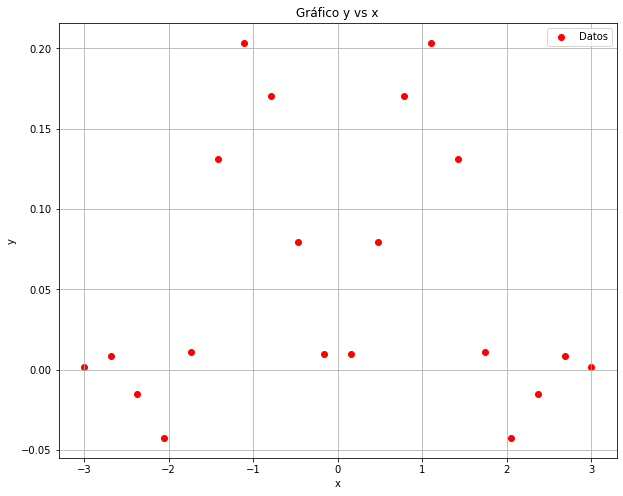

In [11]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.scatter(x,y,color='red',label='Datos')
ax.grid('True')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Gráfico y vs x')

In [12]:
interp = interp1d(x,y,kind='cubic')

In [13]:
x_data = np.linspace(x[0],x[-1],100)

Text(0.5, 1.0, '$x_{interp}$ vs $y_{interp}$')

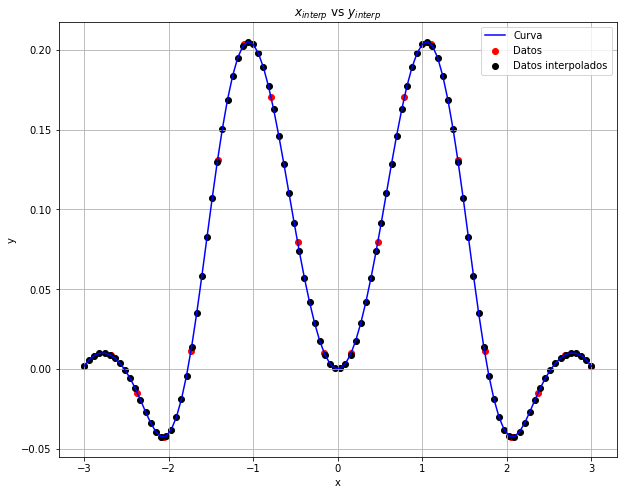

In [14]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.scatter(x,y,color='red',label='Datos')
ax.scatter(x_data,interp(x_data),color='black',label='Datos interpolados')
ax.plot(x_data,interp(x_data),color='blue',label='Curva')
ax.grid('True')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('$x_{interp}$ vs $y_{interp}$')

# Ejercicio III

Se da función (serie de Taylor)

In [15]:
def cos_taylor(x,k):
    cos=0
    for k in range(k):
        cos=cos+(-1)**k/math.factorial(2*k)*x**(2*k)
    return cos

Hacer una gráfica de tiempo de la ejecución de la función para varios `k`, `ks=[1,10,100,1000,2000,3000,4000,5000]` y para `x=0.2` 

In [16]:
ks = [1,10,100,1000,2000,3000,4000,5000]
time_t = []

for i in ks:
  times1 = time.time()

  cos_taylor(0.2,i)

  times2 = time.time()

  time_i = (times2 - times1) 

  time_t.append(time_i)

time_t = np.array(time_t)
print(time_t)               

[1.40666962e-05 1.62124634e-05 3.37123871e-04 5.80077171e-02
 3.94409418e-01 2.11725140e+00 6.18371534e+00 1.21371641e+01]


Hacer una gráfica de tiempo de la ejecución de la función para varios `k`, `ks=[1,10,100,1000,2000,3000,4000,5000]` y para `x=0.2` 

Text(0.5, 1.0, 'Gráfica de tiempo vs ks')

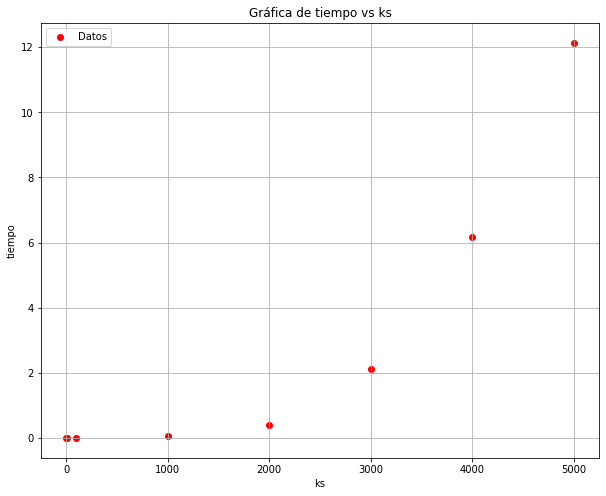

In [17]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.scatter(ks,time_t,color='red',label='Datos')
ax.grid('True')
ax.legend()
ax.set_xlabel('ks')
ax.set_ylabel('tiempo')
plt.title('Gráfica de tiempo vs ks')

# Criterias:

```
# Exercise 1 (max 4p):
#   correct solution:                            4.0p   

# Exercise 2 (max 4p):
#   loading data + plot (max: 2.0p):             2.0p   
#   interpolating + plot (max. 2.0p):            2.0p 


# Exercise 3 (max 2p):
#   implementation (max: 1.0p):                  1.0p   
#   plot (max: 1.0p):                            1.0p   

# TOTAL:                                         10.0p (out of 10p) 

```    